In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ft(f, k, xs, dx, q=0):
    result = 0
    for x in xs:
        result += f(x,q) * np.exp(-1j * k * x)

    return result * dx

def hermite_pol(x, g):
    return (x)

def g(x, a):
    if np.abs(x) < a:
        return 1/(2*a)
    else:
        return 0

def f(x, q):
    return np.exp(-x**2) * np.sin(q*x)

def fri(f):
    v1 = np.real(f)
    v2 = np.imag(f)
    a = np.zeros_like(v1)
    b = np.zeros_like(v2)

    for n in range(len(v1)):
        if np.abs(v1[n]) > 10e-12:
            a[n] = v1[n]

    for n1 in range(len(v2)):
        if np.abs(v2[n1]) > 10e-10:
            b[n1] = v2[n1]

    return np.array([a, b])


def f2d(x, y, q):
    return np.exp(-x**2) * np.exp(-y**2) * np.cos(q*x)**2

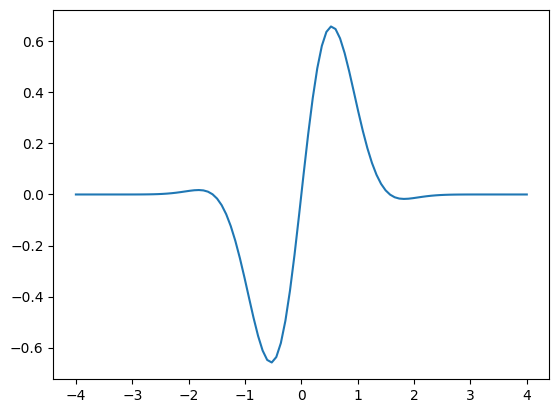

In [81]:
# plota a funcão f
xs = np.linspace(-4, 4, 100)
dx = xs[1] - xs[0]
plt.plot(xs, f(xs, 2))

In [106]:
# calcula transformada de fourier da função f
x = np.linspace(-10, 10, 100)
dx = x[1] - x[0]
z = [ ft(f, k, x, dx, q=2) for k in x ]

Text(0.5, 0, 'imag')

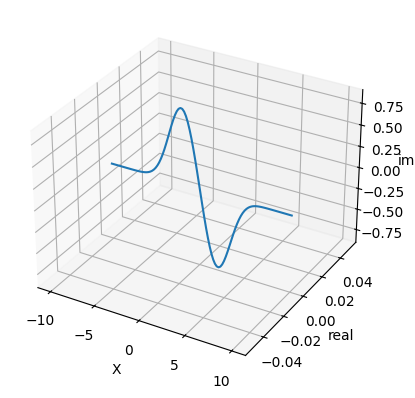

In [108]:
# plota a transformada da função em 2 dimensões imag x real

axis = np.array(fri(z))
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(x, axis[0] , axis[1])

ax.set_xlabel('X')
ax.set_ylabel('real')
ax.set_zlabel('imag')

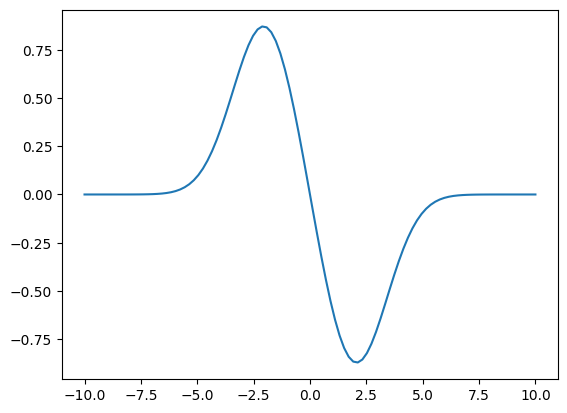

In [109]:
plt.plot(x, np.imag(z))

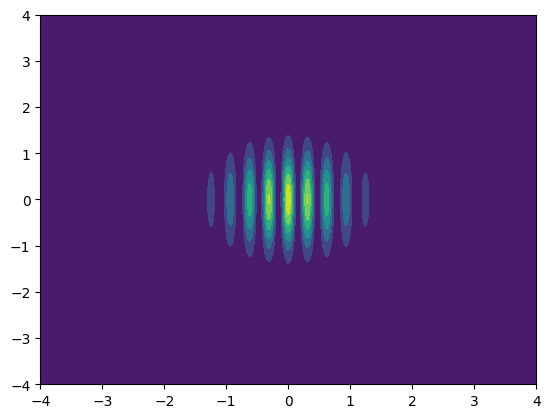

In [104]:
xs = np.linspace(-4, 4, 1000)
ys = np.linspace(-4, 4, 1000)
dx = xs[1] - xs[0]
dy = ys[1] - ys[0]
xg, yg = np.meshgrid(xs,ys)
plt.contourf(xg,yg, f2d(xg, yg, 10))